<a href="https://colab.research.google.com/github/sijeong049/TIL/blob/master/200709.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. sklearn의 load_boston 을 이용해서 boston 데이터를 로드하고, Linear Regression, Ridge Regression, Lasso Regression을 수행하고, 
학습된 모델의 r2_score와 coef_, bias를 출력하시오.. 
Ridge와 Lasso의 알파값은 0.3으로 하시오


In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

In [ ]:
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape, y_train.shape

((404, 13), (404,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LinearRegression?

In [ ]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_train, y_train)

0.7508856358979672

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Linear Regression의 r2_score
r2_score(y_train, y_pred=lin_reg.predict(X_train))

0.7508856358979672

In [ ]:
# Linear Regression의 coef_
lin_reg.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [ ]:
# Linear Regression의 bias
lin_reg.intercept_

30.246750993923925

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridge = Ridge(alpha=0.3).fit(X_train, y_train)
lasso = Lasso(alpha=0.3).fit(X_train, y_train)

In [ ]:
# Ridge Regression의 r2_score
r2_score(y_train, y_pred=ridge.predict(X_train))

0.7504875947861684

In [ ]:
# Ridge Regression의 coef_
ridge.coef_

array([-1.11352783e-01,  3.10286814e-02,  2.60531613e-02,  2.69191282e+00,
       -1.38634794e+01,  4.45542186e+00, -8.91583594e-03, -1.40020034e+00,
        2.56269364e-01, -1.09981209e-02, -8.77211005e-01,  1.24793530e-02,
       -5.14786271e-01])

In [ ]:
# Ridge Regression의 bias
ridge.intercept_

27.959941444774536

In [ ]:
# Lasso Regression의 r2_score
r2_score(y_train, y_pred=lasso.predict(X_train))

0.7322737358367817

In [ ]:
# Lasso Regression의 coef_
lasso.coef_

array([-9.96658335e-02,  3.42747476e-02, -2.11838761e-03,  0.00000000e+00,
       -0.00000000e+00,  3.72501465e+00, -6.12977694e-03, -1.02835422e+00,
        2.42981490e-01, -1.32776941e-02, -7.37563894e-01,  1.28089888e-02,
       -6.11490803e-01])

In [ ]:
# Lasso Regression의 bias
lasso.intercept_

23.248693465008763



2. sklearn의 load_boston 을 이용해서 boston 데이터를 로드하고, sklearn에서 RandomForest를 최대 트리의 깊이를 2로 하고, estimator는 100개로 설정하여 수행하시오. 그리고 mean_squared_error를 출력하시오. 그리고 각 feature 들의 중요도를 출력하십시요.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# max_depth=2, n_estimators=100
rf = RandomForestRegressor(n_estimators=100, max_depth=2).fit(X_train, y_train)
rf.score(X_train, y_train)

0.7681552254229447

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error?

In [ ]:
# Random Forest의 mean_squared_error
tf_mse = mean_squared_error(y_train, y_pred=rf.predict(X_train))
tf_mse

20.14114472839354

In [ ]:
# feature 중요도
print("[feature중요도]")
print(rf.feature_importances_)

[feature중요도]
[0.0030478  0.00101105 0.         0.         0.00153127 0.56610903
 0.         0.0020281  0.         0.         0.00105815 0.
 0.42521459]




3. Tensorflow를 사용해 Mnist 데이터를 분류하고 그 결과를 출력하시요. 어떤 알고리즘, 어떤 모델이든 상관 없습니다.



In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential([
                             layers.Conv2D(64, (3,3), activation='relu'),
                             layers.MaxPooling2D((2,2)),

                             layers.Conv2D(128, (3,3), activation='relu'),
                             layers.MaxPooling2D((2,2)),

                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(10, activation='softmax')                             
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

In [ ]:
X_train_, X_test_ = X_train[..., tf.newaxis], X_test[..., tf.newaxis]

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train_.shape, X_test_.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
X_train_, X_test_ = X_train_ / 255, X_test_ / 255

In [ ]:
model.fit(X_train_, y_train, epochs=3, verbose=1)

Epoch 1/3
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0470 - accuracy: 0.9854
Epoch 2/3
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0300 - accuracy: 0.9906
Epoch 3/3
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0202 - accuracy: 0.9933


In [ ]:
test_loss, test_acc = model.evaluate(x=X_test_, y=y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0299 - accuracy: 0.9910


In [ ]:
print("Accuracy : %.2f" %(test_acc * 100),"%")

Accuracy : 99.10 %



4. Yena 시계열 예측을 하시오.   
-  시계열 예측시 10개의 데이터셋으로 다음 1개를 예측하도록 하시오. 
- train_set과 test_set으로 각각 나눠, 예측하되 예측이 끝난 후,  ploting을 하시오. 
- mse가 평가 지표로 사용되며, y_train std의 10% 아래로 나오도록 학습하십시요. 
-  그리고 test에 대한 mse를 측정하고 출력하십시요.

- 이 때 예측시에는 온도(T (degC))로만 컬럼을 사용하고, 예측 타겟도 온도로 하시오.

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip #데이터셋 다운로드
!unzip jena_climate_2009_2016.csv.zip #데이터셋 압축풀기

--2020-07-09 08:00:01--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.40.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.40.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  6.43MB/s    in 2.0s    

2020-07-09 08:00:04 (6.43 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [ ]:
import pandas as pd
Data = pd.read_csv('jena_climate_2009_2016.csv') #데이터셋 불러오기
Data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
from matplotlib import pyplot as plt
temp = Data['T (degC)']
temp

0        -8.02
1        -8.41
2        -8.51
3        -8.31
4        -8.27
          ... 
420546   -4.05
420547   -3.35
420548   -3.16
420549   -4.23
420550   -4.82
Name: T (degC), Length: 420551, dtype: float64

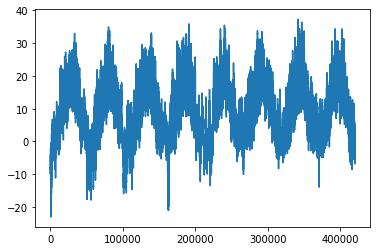

In [ ]:
plt.plot(range(len(temp)), temp)

In [ ]:
data = []
answer = []
for i in range(len(temp)-9-1) :
    data.append(temp[0+i:10+i])
    answer.append(temp[10+i])

len(data), len(answer)

(420541, 420541)

In [ ]:
x = data
y = answer

In [ ]:
import numpy as np

In [ ]:
x_ = np.array(data)
y_ = np.array(answer)

In [ ]:
x_.shape, y_.shape

((420541, 10), (420541,))

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(10,1)))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(x[:35000], y[:35000], epochs=2)


ValueError: ignored